In [8]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
#import torch
print(os.getpid())

3292550


In [9]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

## ImageAnalysis3 section:

In [10]:
import ImageAnalysis3 as ia3

In [11]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

In [12]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'/lab/weissman_imaging/puzheng/Corrections/20230902-Merscope01_s30_n500',
             'shared_parameters':{
                     'single_im_size':[30, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 1000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907
-- 17 folders, 325 fovs detected.


In [14]:
_overwrite = False

_save_images = True

_warp_image = False
_fit_spots = True


#sel_fov_ids = np.concatenate([np.arange(81, 168), np.arange(18, 20)]) # batch1+2 in mendel
sel_fov_ids = np.arange(100,120) #[114]#np.arange(0,10)
# 0-9: processed not warpped.
# 10-19: warpped

for _fov_id in sel_fov_ids:
    # 1. create fov class:
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    
    fov = ia3.classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True, # whether overwrite
                                              )
    # 1.5. Process DAPI image
    fov._load_dapi_image()
    #continue
    # 2. Process image into candidate spots
    fov.parallel = True
    setattr(fov, "merfish_ref_id", 0)
    fov._process_image_to_spots('merfish', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._save_to_file('merfish')

    # 3. Process RNA-spots as reference
    fov.parallel = True
    setattr(fov, "rna_ref_id", 0)
    fov._process_image_to_spots('rna', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._save_to_file('rna')
    

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 748 chromatic_correction_748_637_30_2304_2304.npy
	 637 None
	 545 chromatic_correction_545_637_30_2304_2304.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 748 chromatic_correction_748_637_30_2304_2304_const.pkl
	 637 None
	 545 chromatic_correction_545_637_30_2304_2304_

-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_100.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_100.dax  in 1.456s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_100.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_100.hdf5 in 0.660s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top

-- drift 2: [0. 0. 0.] in 2.068s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.337s
-- generate translation function for chromatic correction for channels: ['637'] and drift:[0. 0. 0.] in 0.000s
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_100.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_100.dax -- finish correction in 33.928s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_100.dax for channels:['748', '637', '545']
637, -- drift 0: [-0.16  2.5   3.11] in 2.233s.
in 11.330s
-- bleedthrough correction for channels: ['748', '637', '545'] 545

-- start aligning given source image to given reference image.
545, -- drift 2: [-0.12  3.23  5.51] in 7.201s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle. in 24.536s
-- removing hot pixels for channels:['748', '637', '545', '477'] 
--- finish drift: [-0.2   3.18  5.47] in 14.701s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.2   3.18  5.47]477,  in 0.001s
-- drift 1: [-0.26  3.21  5.63] in 7.448s.
in 5.369s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.28  2.42  5.14] in 3.762s.
 in 27.905s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 9.249s
-- illumination correction for channels: 748, -- finish correction in 55.983s
-- drift 0: [-0.07  2.62  5.25] in 3.469s.
637, -- drift 1: [-0.15  3.32  5.01] in 9.111s.
545, in 11.495s
-- bleedthrough correction for channels: ['748', '637', '545']  in 30.513s
-- removing

-- finish correction in 112.275s
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 15.723s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- finish correction in 114.061s
-- drift 2: [-0.06  3.98  2.1 ] in 19.774s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.07  3.94  2.13] in 44.136s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.07  3.94  2.13] in 0.000s
-- finish correction in 114.917s
-- finish correction in 119.039s
-- drift 2: [0.   4.39 2.11] in 15.868s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.01  4.32  2.15] in 41.257s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.01  4.32  2.15] in 0.000s
-- updated ims for id:[19, 20, 21], drifts for id:[19

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


755 seeded with th=1000.0, 765 seeded with th=1000.0, 755 seeded with th=1000.0, 830 seeded with th=1000.0, 845 seeded with th=1000.0, 843 seeded with th=1000.0, 907 seeded with th=1000.0, 794 seeded with th=1000.0, 852 seeded with th=1000.0, 755 fitted in 589.033s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[1, 2, 3] in 0.068s
822 seeded with th=1000.0, 1000 seeded with th=1000.0, 904 seeded with th=1000.0, 1000 seeded with th=1000.0, 765 fitted in 599.859s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[4, 5, 6] in 0.080s
1000 seeded with th=1000.0, 755 fitted in 607.092s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[7, 8, 9] in 0.080s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 830 fitted in 640.657s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[10, 11, 12] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


794 fitted in 611.236s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[25, 26, 27] in 0.064s
1000 fitted in 907.814s.
-- start fitting spots in channel:545, 845 fitted in 675.466s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[13, 14, 15] in 0.068s
843 fitted in 646.130s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[16, 17, 18] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


852 fitted in 640.260s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[28, 29, 30] in 0.058s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


907 fitted in 670.614s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[19, 20, 21] in 0.048s
822 fitted in 627.655s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[31, 32, 33] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


904 fitted in 666.167s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[34, 35, 36] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 705.820s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[37, 38, 39] in 0.048s
1000 seeded with th=1000.0, 1000 fitted in 673.795s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[43, 44, 45] in 0.039s
1000 fitted in 639.292s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[49, 50, 51] in 0.034s
1000 fitted in 710.748s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[40, 41, 42] in 0.025s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 228.403s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
-- updated spots for id:[46, 47, 48] in 0.023s
, finish in 1882.78s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_100.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.304s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_100.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_100.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_100.dax  in 1.136s
-- removing hot pixels for channels:['

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_101.dax  in 5.792s
-- removing hot pixels for channels:['405'] in 2.772s
-- illumination correction for channels: 405, in 1.353s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.242s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
++ base attributes saved:['dapi_im'] in 1.628s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_101.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_101.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_40

-- illumination correction for channels: 748, 637, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_101.dax for channels:['748', '637', '545']
545, - loading merfish info from file:Conv_zscan_101.hdf5 in 10.537s
-- bleedthrough correction for channels: ['748', '637', '545']  in 10.148s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.813s.
- loading merfish info from file:Conv_zscan_101.hdf5 + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H11M12/Conv_zscan_101.dax for channels:['748', '637', '545']
477, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_101.dax
-- loading image from file:/lab/weissman_

-- start aligning given source image to given reference image.
 in 20.889s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- updated ims for id:[53], drifts for id:[53] in 0.948s
- loading merfish info from file:Conv_zscan_101.hdf5-- start fitting spots in channel:637,  in 0.689s.
- loading merfish info from file:Conv_zscan_101.hdf5 -- drift 2: [-0.92  2.77  5.75] in 2.539s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.58  2.66  6.04] in 7.021s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.58  2.66  6.04] in 0.000s
in 9.853s
-- illumination correction for channels: 748, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/C

-- illumination correction for channels: 748, 477, -- finish correction in 87.293s
637, in 5.653s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
545, 477, -- drift 2: [-1.51  3.97  4.72] in 15.905s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.-- finish correction in 86.343s
--- finish drift: [-0.95  3.8   5.04] in 32.284s
in 8.891s
-- illumination correction for channels: 748, 
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.95  3.8   5.04] in 0.000s
in 5.566s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-0.61  3.76  4.44] in 16.398s.
637, -- drift 0: [-0.8   4.36  3.1 ] in 5.061s.
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 11.824s
545, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_

-- start fitting spots in channel:545, 49 fitted in 427.749s.
-- start fitting spots in channel:545, 74 seeded with th=1000.0, 17 seeded with th=1000.0, 63 fitted in 430.343s.
-- start fitting spots in channel:545, 17 fitted in 419.226s.
-- start fitting spots in channel:545, 74 fitted in 430.931s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 415.218s.
-- start fitting spots in channel:545, 16 seeded with th=1000.0, 25 seeded with th=1000.0, 16 fitted in 420.554s.
-- start fitting spots in channel:545, 25 fitted in 431.290s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 417.897s.
-- start fitting spots in channel:545, 124 seeded with th=1000.0, 74 seeded with th=1000.0, 17 seeded with th=1000.0, 17 fitted in 419.261s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 124 fitted in 454.558s.
-- start fitting spots in channel:545, 74 fitted in 433.125s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


633 seeded with th=1000.0, 590 seeded with th=1000.0, 600 seeded with th=1000.0, 630 seeded with th=1000.0, 776 seeded with th=1000.0, 679 seeded with th=1000.0, 748 seeded with th=1000.0, 606 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


629 seeded with th=1000.0, 803 seeded with th=1000.0, 625 seeded with th=1000.0, 989 seeded with th=1000.0, 590 fitted in 578.201s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[1, 2, 3] in 0.096s
632 fitted in 606.491s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[4, 5, 6] in 0.072s
600 fitted in 602.685s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[7, 8, 9] in 0.104s
673 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


627 fitted in 615.907s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[10, 11, 12] in 0.076s
606 fitted in 602.363s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[25, 26, 27] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


679 fitted in 635.580s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[16, 17, 18] in 0.036s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


629 fitted in 595.037s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[28, 29, 30] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


776 fitted in 693.815s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[13, 14, 15] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


748 fitted in 667.954s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[19, 20, 21] in 0.051s
625 fitted in 602.131s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[31, 32, 33] in 0.040s
999 fitted in 957.306s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


673 fitted in 584.039s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[34, 35, 36] in 0.047s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


802 fitted in 687.665s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[37, 38, 39] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 seeded with th=1000.0, 1000 fitted in 644.681s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[49, 50, 51] in 0.043s
987 fitted in 719.952s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[40, 41, 42] in 0.040s
1000 fitted in 663.047s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[43, 44, 45] in 0.025s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 203.736s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
-- updated spots for id:[46, 47, 48] in 0.022s
, finish in 1884.16s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_101.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.260s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_101.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_101.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_101.dax  in 1.162s
-- removing hot pixels for channels:['

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_102.dax  in 6.105s
-- removing hot pixels for channels:['405'] in 2.823s
-- illumination correction for channels: 405, in 1.385s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.641s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
++ base attributes saved:['dapi_im'] in 1.629s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_102.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_102.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_40

- loading merfish info from file:Conv_zscan_102.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H6M7/Conv_zscan_102.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H6M7/Conv_zscan_102.dax in 0.735s.
- loading merfish info from file:Conv_zscan_102.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_102.dax
477, -- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.23  2.61  6.2 ] in 0.000s
545, -- finish correction in 48.459s
477, in 10.002s
-- illumination correction for channels: 748, - loading merfish info from file:Conv_zscan_102.hdf5 in 12.593s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [-0.24  2.53  5.64] in 3.117s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.29  2.69  5.75] in 9.236s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.29  2.69  5.75] in 0.000s
 in 30.770s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 5.638s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 0.838s.
- loading merfish info from file:Conv_zscan_102.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: 

-- removing hot pixels for channels:['748', '637', '545', '477'] -- finish correction in 89.866s
637, 545, -- drift 2: [-0.19  2.85  4.43] in 16.456s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.27  3.02  4.53] in 36.760s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.27  3.02  4.53] in 0.000s-- drift 1: [-0.35  3.13  4.79] in 17.148s.

477, in 5.780s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.481s
-- bleedthrough correction for channels: ['748', '637', '545'] -- finish correction in 95.563s
-- finish correction in 96.617s
-- drift 2: [-0.22  2.9   5.16] in 17.265s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.33  3.07  5.25] in 37.940s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.33  3.07  5.25] in 0.000s
in 10.607s
-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


66 fitted in 431.986s.
-- start fitting spots in channel:545, 122 fitted in 458.910s.
-- start fitting spots in channel:545, 214 fitted in 466.510s.
-- start fitting spots in channel:545, 81 seeded with th=1000.0, 102 fitted in 441.800s.
-- start fitting spots in channel:545, 84 seeded with th=1000.0, 81 fitted in 437.973s.
-- start fitting spots in channel:545, 88 seeded with th=1000.0, 84 fitted in 429.890s.
-- start fitting spots in channel:545, 61 seeded with th=1000.0, 88 fitted in 436.332s.
-- start fitting spots in channel:545, 61 fitted in 429.592s.
-- start fitting spots in channel:545, 56 seeded with th=1000.0, 56 seeded with th=1000.0, 56 fitted in 435.353s.
-- start fitting spots in channel:545, 37 seeded with th=1000.0, 56 fitted in 426.526s.
-- start fitting spots in channel:545, 37 fitted in 420.914s.
-- start fitting spots in channel:545, 49 seeded with th=1000.0, 38 seeded with th=1000.0, 53 seeded with th=1000.0, 49 fitted in 428.040s.
-- start fitting spots in channe

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


646 seeded with th=1000.0, 671 seeded with th=1000.0, 642 seeded with th=1000.0, 670 seeded with th=1000.0, 737 seeded with th=1000.0, 711 seeded with th=1000.0, 779 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


655 seeded with th=1000.0, 691 seeded with th=1000.0, 699 seeded with th=1000.0, 807 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


706 seeded with th=1000.0, 981 seeded with th=1000.0, 642 fitted in 605.845s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[1, 2, 3] in 0.084s
671 fitted in 616.011s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[4, 5, 6] in 0.076s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 646 fitted in 627.559s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[7, 8, 9] in 0.080s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


670 fitted in 640.077s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[10, 11, 12] in 0.080s
654 fitted in 611.281s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[25, 26, 27] in 0.064s
711 fitted in 655.601s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[16, 17, 18] in 0.044s
736 fitted in 680.710s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[13, 14, 15] in 0.060s
691 fitted in 617.721s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for i

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


706 fitted in 595.770s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[34, 35, 36] in 0.047s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


806 fitted in 662.152s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[37, 38, 39] in 0.040s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 1020.555s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 647.038s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[49, 50, 51] in 0.038s
981 fitted in 689.537s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[40, 41, 42] in 0.035s
1000 fitted in 679.189s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[43, 44, 45] in 0.023s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 140.258s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[46, 47, 48] in 0.022s
, finish in 1900.40s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.288s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_102.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_102.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_102.dax  in 1.179s
-- removing hot pixels for channels:['

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 74.649s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
-- updated spots for id:[2] in 0.037s
, finish in 113.02s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_102.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.289s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_103.dax for channels:['637']
- loading merfish info from file:Conv_zscan_103.hdf5 in 0.231s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_103.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_103.dax  in 1.381s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_103.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_103.hdf5 in 0.695s.
-- ['748', '637', '545'] images are required to process, [] images are l

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_103.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_103.dax in 8.686s
-- illumination correction for channels: 748, in 0.676s.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_103.dax for channels:['748', '637', '545']
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H11M12/Conv_zscan_103.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H11M12/Conv_zscan_103.dax -- drift 0: [0. 0. 0.] in 2.094s.
637, in 10.781s
-- bleedthrough correction f

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_103.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_103.dax in 5.835s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
637, -- drift 1: [-0.19  2.75  3.41] in 4.227s.
545, in 11.140s
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 3.781s-- bleedthrough correction for channels: ['748', '637', '545'] 
-- start fitting spots in channel:748, -- drift 0: [-0.44  2.99  2.99] in 2.781s.
477, in 8.708s
-- illumination correction for channels: 748, in 5.795s
-- apply bead_drift calculate for channel: 477
637, -- start aligning given source image to given reference image.
545, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
in 10.794s
-- bleedthrough c

-- start aligning given source image to given reference image.
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 11.520s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- drift 0: [-0.04  3.03  0.16] in 4.801s.
-- finish correction in 93.593s
-- drift 1: [-0.13  3.47  1.45] in 17.211s.
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 12.180s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- drift 1: [-0.11  3.73 -0.14] in 18.200s.
-- drift 1: [-0.11  3.2   0.09] in 17.221s.
-- updated ims for id:[28, 29, 30], drifts for id:[28, 29, 30] in 13.152s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


848 seeded with th=1000.0, 865 seeded with th=1000.0, 872 seeded with th=1000.0, 871 seeded with th=1000.0, 935 seeded with th=1000.0, 1000 seeded with th=1000.0, 997 seeded with th=1000.0, 832 seeded with th=1000.0, 851 seeded with th=1000.0, 882 seeded with th=1000.0, 968 seeded with th=1000.0, 904 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 848 fitted in 636.377s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- updated spots for id:[4, 5, 6] in 0.132s
1000 seeded with th=1000.0, 865 fitted in 653.664s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- updated spots for id:[1, 2, 3] in 0.076s
872 fitted in 662.792s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- updated spots for id:[7, 8

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


904 fitted in 638.986s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- updated spots for id:[34, 35, 36] in 0.056s
967 fitted in 667.681s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- updated spots for id:[37, 38, 39] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 681.997s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- updated spots for id:[40, 41, 42] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 625.497s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- updated spots for id:[49, 50, 51] in 0.034s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 663.894s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- updated spots for id:[43, 44, 45] in 0.039s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 839.264s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- updated spots for id:[16, 17, 18] in 0.039s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 246.878s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- updated spots for id:[46, 47, 48] in 0.059s
, finish in 1864.80s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.270s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_103.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_103.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_103.dax  in 1.113s
-- removing hot pixels for channels:['

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 77.572s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
-- updated spots for id:[2] in 0.044s
, finish in 114.31s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_103.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.272s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_104.dax for channels:['637']
- loading merfish info from file:Conv_zscan_104.hdf5 in 0.226s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_104.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_104.dax  in 1.363s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_104.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_104.hdf5 in 0.828s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_104.dax -- drift 1: [0. 0. 0.] in 2.176s.
in 0.810s.
in 11.845s
-- illumination correction for channels: 748, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_104.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_104.dax in 11.492s
-- bleedthrough correction for channels: ['748', '637', '545'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_104.dax for channels:['748', '637', '545']
-- drift 2: [0. 0. 0.] in 2.051s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- fin

--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.09  3.09  3.5 ] in 7.401s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.09  3.09  3.5 ] in 0.001s
477, -- finish correction in 50.545s
in 9.878s
-- illumination correction for channels: 748, in 6.044s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
637, in 11.537s
-- bleedthrough correction for channels: ['748', '637', '545'] 545, -- drift 0: [-0.86  4.67  2.85] in 2.311s.
 in 38.739s
-- removing hot pixels for channels:['748', '637', '545', '477'] 477, in 6.275s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-0.45  4.34  2.73] in 3.359s.
in 11.182s
-- illumination correction for channels: 748, in 11.868s
-- bleedthrough correction for channels: ['748', '637', '545'] 637, -- drift 0: [-0.07  2.57  5.  ] in 2.

477, in 5.829s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 9.972s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- drift 0: [0.03 3.78 1.32] in 4.715s.
-- drift 1: [-0.03  4.43  1.44] in 15.976s.
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 11.824s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5-- start fitting spots in channel:748, 
-- drift 2: [-0.14  4.11  0.74] in 17.529s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.09  4.1   0.78] in 38.943s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.09  4.1   0.78] in 0.001s
-- drift 1: [0.03

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


5 seeded with th=1000.0, 57 fitted in 414.498s.
-- start fitting spots in channel:637, 5 fitted in 409.305s.
-- start fitting spots in channel:637, 86 seeded with th=1000.0, 15 seeded with th=1000.0, 11 seeded with th=1000.0, 15 fitted in 423.001s.
-- start fitting spots in channel:637, 86 fitted in 436.165s.
-- start fitting spots in channel:637, 11 fitted in 420.940s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 424.598s.
-- start fitting spots in channel:637, 176 seeded with th=1000.0, 19 seeded with th=1000.0, 19 fitted in 430.766s.
-- start fitting spots in channel:637, 13 seeded with th=1000.0, 13 fitted in 433.418s.
-- start fitting spots in channel:637, 176 fitted in 470.702s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 450.354s.
-- start fitting spots in channel:637, 64 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 447.225s.
-- start fitting spots in channel:637, 64 fitted in 440.100s.
-- start fittin

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


60 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


65 fitted in 447.490s.
-- start fitting spots in channel:545, 135 seeded with th=1000.0, 1000 seeded with th=1000.0, 60 fitted in 441.348s.
-- start fitting spots in channel:545, 135 fitted in 446.751s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


942 seeded with th=1000.0, 966 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


960 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


993 seeded with th=1000.0, 1000 seeded with th=1000.0, 976 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


882 seeded with th=1000.0, 1000 seeded with th=1000.0, 924 seeded with th=1000.0, 925 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


942 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


966 fitted in 661.775s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[4, 5, 6] in 0.080s
942 fitted in 696.407s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[7, 8, 9] in 0.092s
1000 fitted in 937.480s.
-- start fitting spots in channel:545, 960 fitted in 703.325s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[10, 11, 12] in 0.076s
993 fitted in 674.802s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[1, 2, 3] in 0.076s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


882 fitted in 663.442s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[25, 26, 27] in 0.072s
976 fitted in 697.085s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
1000 fitted in 715.584s.
-- updated spots for id:[16, 17, 18] in 0.048s
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[13, 14, 15] in 0.062s
924 fitted in 672.495s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[28, 29, 30] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 687.130s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[19, 20, 21] in 0.060s
925 fitted in 682.064s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[31, 32, 33] in 0.052s
941 fitted in 622.438s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[34, 35, 36] in 0.044s
1000 fitted in 678.837s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[37, 38, 39] in 0.048s
1000 fitted in 668.501s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots fo

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


998 fitted in 184.837s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[46, 47, 48] in 0.023s
, finish in 1846.21s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.303s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_104.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_104.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_104.dax  in 1.152s
-- removing hot pixels for channels:['4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 75.524s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
-- updated spots for id:[2] in 0.038s
, finish in 112.51s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_104.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.250s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_105.dax for channels:['637']
- loading merfish info from file:Conv_zscan_105.hdf5 in 0.224s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_105.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_105.dax  in 1.406s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_105.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_105.hdf5 in 0.678s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_105.dax 545, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_105.dax for channels:['748', '637', '545']
-- drift 1: [0. 0. 0.] in 2.017s.
477, in 8.685s
-- illumination correction for channels: 748, -- drift 2: [0. 0. 0.] in 2.002s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.070s
-- generate translation function for chromatic correction for channels: ['637'] and drift:[0. 0. 0.] in 0.000s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_105.dax for channels:['748', '637', '545']
in 5.786s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 33.094s
637, - loading merfish info from file:Conv_zscan_105.hdf5  in 15.327s
-- r

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.05  2.45  3.46] in 25.448s
-- removing hot pixels for channels:['748', '637', '545', '477']  in 11.292sin 0.000s

-- bleedthrough correction for channels: ['748', '637', '545'] 637, -- drift 1: [-0.02  1.55  1.34] in 5.676s.
545, -- drift 0: [-0.38  3.82  1.95] in 3.158s.
-- finish correction in 50.630s
in 9.298s
-- illumination correction for channels: 748, 477, -- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 5.437s
-- start fitting spots in channel:748, 637, in 5.675s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
545, in 11.310s
-- bleedthrough correction for channels: ['748', '637', '545'] 477, -- drift 0: [-0.13  2.07  3.27] in 3.054s.
-- drift 2: [0.   1.72 1.52] in 7.019s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.01  1.77  1.52] in 15.483s
-- generate transla

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.12  3.59  0.89] in 0.001s
-- finish correction in 95.061s
-- finish correction in 100.752s
-- drift 1: [-0.14  3.42  0.49] in 17.414s.
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 12.496s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5-- start fitting spots in channel:748, 
-- drift 2: [-0.03  3.13  0.12] in 17.730s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.05  3.18  0.13] in 38.588s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.05  3.18  0.13] in 0.000s
-- drift 1: [-0.04  3.84 -0.86] in 17.559s.
-- finish correction in 105.627s
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 11.980s
-- start fitting spots in channel:748, - writting merfish info to file:/lab

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


321 fitted in 390.652s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[53] in 0.984s
41 seeded with th=1000.0, 194 fitted in 397.415s.
-- start fitting spots in channel:637, 41 fitted in 388.449s.
-- start fitting spots in channel:637, 34 seeded with th=1000.0, 34 fitted in 396.459s.
-- start fitting spots in channel:637, 41 seeded with th=1000.0, 41 fitted in 398.147s.
-- start fitting spots in channel:637, 20 seeded with th=1000.0, 20 fitted in 403.494s.
-- start fitting spots in channel:637, 13 seeded with th=1000.0, 13 fitted in 404.757s.
-- start fitting spots in channel:637, 19 seeded with th=1000.0, 19 fitted in 410.614s.
-- start fitting spots in channel:637, 11 seeded with th=1000.0, 12 seeded with th=1000.0, 11 fitted in 414.019s.
-- start fitting spots in channel:637, 12 fitted in 412.352s.
-- start fitting spots in channel:637, 10 seeded with th=1000.0, 168 seeded

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


922 seeded with th=1000.0, 945 seeded with th=1000.0, 846 seeded with th=1000.0, 832 seeded with th=1000.0, 869 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 905 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 818 fitted in 649.512s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[4, 5, 6] in 0.084s
856 fitted in 650.770s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[1, 2, 3] in 0.060s
862 fitted in 690.670s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[7, 8, 9] in 0.100s
1000 fitted in 914.825s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


876 fitted in 708.648s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[10, 11, 12] in 0.072s
846 fitted in 662.757s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[25, 26, 27] in 0.084s
832 fitted in 655.552s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[28, 29, 30] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


929 fitted in 721.173s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[13, 14, 15] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


945 fitted in 716.097s.
869 fitted in 668.724s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[19, 20, 21] in 0.052s
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[31, 32, 33] in 0.048s
922 fitted in 735.210s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[16, 17, 18] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


905 fitted in 663.640s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[34, 35, 36] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 716.371s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[37, 38, 39] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 632.674s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[49, 50, 51] in 0.038s
1000 fitted in 675.999s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[43, 44, 45] in 0.043s
1000 fitted in 705.065s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
1000 seeded with th=1000.0, -- updated spots for id:[40, 41, 42] in 0.027s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 241.506s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[46, 47, 48] in 0.023s
, finish in 1861.60s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.314s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_105.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_105.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_105.dax  in 1.122s
-- removing hot pixels for channels:['

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 74.804s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
-- updated spots for id:[2] in 0.037s
, finish in 112.87s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_105.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.259s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_106.dax for channels:['637']
- loading merfish info from file:Conv_zscan_106.hdf5 in 0.229s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_106.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_106.dax  in 1.397s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_106.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_106.hdf5 in 0.662s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_106.dax in 8.780s
-- illumination correction for channels: 748, in 5.901s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_106.dax for channels:['748', '637', '545']
637, in 11.243s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [0. 0. 0.] in 2.029s.
545, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_106.dax for channels:['748', '637', '545']
 in 7.936s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [0. 0. 0.] in 2.074s.
477, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_106.dax for channels:['748', '637', '545']
in 10.

477, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
in 10.455s
-- illumination correction for channels: 748,  in 26.436s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 6.146s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0.06 2.71 3.69] in 2.979s.
637, 545, -- drift 0: [-0.3   2.62  3.23] in 2.591s.
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 3.810s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5-- start fitting spots in channel:748, in 12.157s
-- bleedthrough correction for channels: ['748', '637', '545'] 
in 9.354s
-- illumination correction for channels: 748, 477, 637, in 5.936s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 8.916s
-- illumin

--- finish drift: [-0.04  3.79  2.2 ] in 39.549s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.04  3.79  2.2 ] in 0.000s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 11.816s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5-- drift 1: [-0.01  4.07  1.22] in 19.193s.

-- drift 1: [ 0.04  3.79 -0.17] in 18.324s.
-- drift 2: [-0.02  3.97  0.19] in 19.147s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.01  3.97  0.19] in 41.351s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.01  3.97  0.19] in 0.001s
-- finish correction in 99.532s
-- finish correction in 106.713s
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 12.364s
-- start fitting spots in channel:748, - writting merfish i

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


5 fitted in 433.849s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


5 fitted in 459.485s.
-- start fitting spots in channel:637, 88 fitted in 453.645s.
-- start fitting spots in channel:637, 8 seeded with th=1000.0, 8 fitted in 443.174s.
-- start fitting spots in channel:637, 41 seeded with th=1000.0, 9 seeded with th=1000.0, 41 fitted in 434.027s.
-- start fitting spots in channel:637, 9 fitted in 450.561s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 447.104s.
-- start fitting spots in channel:637, 68 seeded with th=1000.0, 33 seeded with th=1000.0, 33 fitted in 416.284s.
-- start fitting spots in channel:545, 68 fitted in 425.164s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 414.320s.
-- start fitting spots in channel:545, 21 seeded with th=1000.0, 21 fitted in 419.756s.
-- start fitting spots in channel:545, 17 seeded with th=1000.0, 17 fitted in 423.194s.
-- start fitting spots in channel:545, 30 seeded with th=1000.0, 14 seeded with th=1000.0, 30 fitted in 429.251s.
-- start fitting s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 632.249s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[1, 2, 3] in 0.080s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 644.995s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[4, 5, 6] in 0.080s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 667.570s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[7, 8, 9] in 0.092s
1000 fitted in 633.928s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 655.551s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[13, 14, 15] in 0.056s
1000 fitted in 637.499s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[16, 17, 18] in 0.092s
1000 fitted in 638.757s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[19, 20, 21] in 0.056s
1000 fitted in 625.849s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[25, 26, 27] in 0.052s
1000 fitted in 911.177s.
-- start fitting spots in channel:545, 1000 fitted in 625.518s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 597.543s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[31, 32, 33] in 0.056s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 605.371s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[34, 35, 36] in 0.044s
1000 fitted in 609.158s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[37, 38, 39] in 0.040s
1000 fitted in 568.758s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[43, 44, 45] in 0.039s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 567.485s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[49, 50, 51] in 0.042s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 591.359s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[40, 41, 42] in 0.024s
1000 seeded with th=1000.0, 1000 fitted in 103.264s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[46, 47, 48] in 0.021s
, finish in 1734.91s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.270s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_106.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_106.dax
-- loading illumination correction pro

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 92.502s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
-- updated spots for id:[2] in 0.037s
, finish in 128.55s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_106.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.253s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_107.dax for channels:['637']
- loading merfish info from file:Conv_zscan_107.hdf5 in 0.222s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_107.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_107.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_107.dax  in 1.377s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_107.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_107.hdf5 in 0.654s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_107.dax for channels:['748', '637', '545']
in 0.798s.
- loading merfish info from file:Conv_zscan_107.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_107.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_107.dax
-- drift 2: [0. 0. 0.] in 2.074s.
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_107.dax --- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.253s
-- generate translation function for chromatic correction for channels: ['637'] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 33.2

-- illumination correction for channels: 748, in 13.263s
-- bleedthrough correction for channels: ['748', '637', '545'] 637, -- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 4.556s-- drift 2: [-0.14  2.57  5.06] in 6.231s.

-- start fitting spots in channel:748, --- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.22  2.63  5.1 ] in 15.700s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.22  2.63  5.1 ] in 0.001s
-- drift 0: [-0.44  2.88  4.17] in 3.299s.
545, in 11.010s
-- illumination correction for channels: 748, 477, -- drift 1: [-0.11  2.74  5.7 ] in 7.729s.
in 12.286s
-- bleedthrough correction for channels: ['748', '637', '545'] 637, in 6.073s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 56.418s
545,  in 27.058s
-- removing hot pixels for channels:['748', '637', '545', '477'] 477, -- drift 0: 

-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 12.501s-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.02  2.95  2.37] 
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_107.hdf5in 0.001s

-- drift 2: [0.03 3.49 2.69] in 16.965s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.07 3.52 2.7 ] in 41.549s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.07 3.52 2.7 ] in 0.001s
-- drift 2: [-0.03  3.63  1.27] in 16.823s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.02  3.66  1.27] in 40.331s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.02  3.66  1.27] in 0.000s
-- finish correction in 112.948s
-- drift 1: [0.04 3.39 1

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 624.766s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_107.hdf5
-- updated spots for id:[1, 2, 3] in 0.080s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 636.609s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_107.hdf5
-- updated spots for id:[4, 5, 6] in 0.088s
1000 seeded with th=1000.0, 1000 fitted in 620.059s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_107.hdf5
-- updated spots for id:[7, 8, 9] in 0.060s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0,

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

999 fitted in 133.243s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_107.hdf5
-- updated spots for id:[2] in 0.039s
, finish in 170.56s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_107.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.259s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_108.dax for channels:['637']
- loading merfish info from file:Conv_zscan_108.hdf5 in 0.230s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_108.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_108.dax  in 1.442s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_108.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_108.hdf5 in 0.695s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_108.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_108.dax for channels:['748', '637', '545']
in 11.280s
-- illumination correction for channels: 748, -- drift 1: [0. 0. 0.] in 2.186s.
637, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_108.dax for channels:['748', '637', '545']
545, -- drift 2: [0. 0. 0.] in 2.132s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.517s
-- generate translation function for chromatic correction for channels: ['637'] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 34.770s
- loading merfish info from file:Conv_zscan_108.hdf5 in 9.904s
-- illumination correction for channels: 748,  in 15.855s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch

637, -- drift 2: [-0.09  3.59  5.26] in 4.618s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.09  3.42  5.32] in 12.101s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.09  3.42  5.32] in 0.001s
-- drift 1: [-0.1   3.36  5.22] in 5.297s.
545, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
in 10.058s
-- illumination correction for channels: 748,  in 22.020s
-- removing hot pixels for channels:['748', '637', '545', '477'] 477, -- drift 0: [-0.07  3.28  4.52] in 3.790s.
637, in 5.925s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 55.976s
545, in 12.114s
-- bleedthrough correction for channels: ['748', '637', '545'] 477, -- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 5.241s
-- start fitting spots in channel:748, -

-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 13.360s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
-- drift 1: [0.03 3.99 1.44] in 18.888s.
-- finish correction in 104.047s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 11.353s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
-- drift 2: [-0.04  4.6   1.65] in 17.224s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.04  4.73  1.61] in 40.675s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.04  4.73  1.61] in 0.001s
-- drift 2: [0.02 4.29 1.65] in 16.237s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.14 4.26 1.74] in 39.470s
-- g

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


5 fitted in 416.080s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


7 fitted in 457.830s.
-- start fitting spots in channel:545, 27 seeded with th=1000.0, 8 seeded with th=1000.0, 19 seeded with th=1000.0, 27 fitted in 442.006s.
-- start fitting spots in channel:545, 8 fitted in 456.846s.
-- start fitting spots in channel:545, 19 fitted in 433.084s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 417.207s.
-- start fitting spots in channel:545, 17 seeded with th=1000.0, 17 fitted in 425.204s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 9 seeded with th=1000.0, 9 fitted in 435.611s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 616.938s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
-- updated spots for id:[1, 2, 3] in 0.072s
1000 fitted in 621.764s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
-- updated spots for id:[4, 5, 6] in 0.072s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 fitted in 611.776s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
-- updated spots for id:[10, 11, 12] in 0.052s
1000 fitted in 631.594s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
-- updated spots for id:[7, 8, 9] in 0.116s
1000 fitted in 622.934s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
-- updated spots for id:[13, 14, 15] in 0.080s
1000 fitted in 610.938s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
-- updated spots for id:[16, 17, 18] in 0.068s
1000 fitted in 603.355s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_1

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 527.761s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
-- updated spots for id:[43, 44, 45] in 0.025s
1000 seeded with th=1000.0, 1000 fitted in 94.152s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
-- updated spots for id:[46, 47, 48] in 0.022s
, finish in 1713.77s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.247s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_108.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_108.dax
-- loading illumination correction prof

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 125.500s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
-- updated spots for id:[2] in 0.038s
, finish in 162.39s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_108.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.267s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromat

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_109.dax for channels:['637']
- loading merfish info from file:Conv_zscan_109.hdf5 in 0.226s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_109.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_109.dax  in 1.387s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_109.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_109.hdf5 in 0.767s.
-- ['748', '637', '545'] images are required to process, [] images are l

637, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_109.dax for channels:['748', '637', '545']
-- drift 1: [0. 0. 0.] in 1.900s.
in 10.585s
-- bleedthrough correction for channels: ['748', '637', '545'] 545, - loading merfish info from file:Conv_zscan_109.hdf5 477, -- drift 2: [0. 0. 0.] in 1.926s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 5.839s
-- generate translation function for chromatic correction for channels: ['637'] and drift:[0. 0. 0.] in 0.000s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_109.dax for channels:['748', '637', '545']
 in 11.912s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- finish correction in 32.080s
in 0.801s.
- loading merfish info from file:Conv_zscan_109.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_109.dax -- drift 1: [-0.53  3.    4.35] in 4.447s.
in 5.710s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
637, in 8.819s
-- illumination correction for channels: 748, 545, -- drift 0: [-0.2   2.85  3.59] in 2.352s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- drift 2: [-1.08  3.3   4.78] in 3.509s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.637, 
--- finish drift: [-0.6   3.06  4.43] in 10.667s
477, -- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.6   3.06  4.43] in 0.000s
 in 29.443s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, in 5.808s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.4   3.35  3.06] in 0.001s
-- drift 0: [ 0.21  3.63 -0.87] in 5.312s.
-- drift 2: [-1.04  4.04  1.47] in 16.218s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.34  3.68  1.07] in 37.669s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.34  3.68  1.07] in 0.000s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 11.841s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5-- start fitting spots in channel:748, 
-- finish correction in 103.058s
-- drift 2: [-1.05  4.69  2.48] in 16.529s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.39  4.33  2.06] in 36.840s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


777 seeded with th=1000.0, 856 seeded with th=1000.0, 1000 seeded with th=1000.0, 762 seeded with th=1000.0, 849 seeded with th=1000.0, 921 seeded with th=1000.0, 848 seeded with th=1000.0, 1000 seeded with th=1000.0, 927 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 777 fitted in 635.879s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[4, 5, 6] in 0.083s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 762 fitted in 658.251s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[1, 2, 3] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 977.657s.
-- start fitting spots in channel:545, 856 fitted in 778.805s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[7, 8, 9] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


848 fitted in 728.878s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[25, 26, 27] in 0.072s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


849 fitted in 776.128s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[10, 11, 12] in 0.068s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


921 fitted in 793.669s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[16, 17, 18] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 840.143s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[13, 14, 15] in 0.068s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


927 fitted in 797.960s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[28, 29, 30] in 0.051s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 859.559s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[19, 20, 21] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 843.474s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[31, 32, 33] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 844.779s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[37, 38, 39] in 0.048s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 816.571s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[34, 35, 36] in 0.039s
1000 fitted in 829.828s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[40, 41, 42] in 0.039s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 771.866s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[49, 50, 51] in 0.038s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 845.664s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[43, 44, 45] in 0.027s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 338.682s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[46, 47, 48] in 0.022s
, finish in 2031.20s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.216s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_109.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_109.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_109.dax  in 0.978s
-- removing hot pixels for channels:['

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 65.753s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
-- updated spots for id:[2] in 0.037s
, finish in 103.60s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_109.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.278s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_110.dax for channels:['637']
- loading merfish info from file:Conv_zscan_110.hdf5 in 0.227s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_110.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_110.dax  in 1.427s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_110.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_110.hdf5 in 0.629s.
-- ['748', '637', '545'] images are required to process, [] images are l

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_110.dax
in 9.534s
-- illumination correction for channels: 748, -- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_110.dax in 0.729s.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_110.dax for channels:['748', '637', '545']
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H11M12/Conv_zscan_110.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H11M12/Conv_zscan_110.dax -- drift 0: [0. 0. 0.] in 1.992s.
637, in 11.524s
-- bleedthrough correction f

-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [-0.18  3.04  4.87] in 2.508s.in 12.997s
-- illumination correction for channels: 748
, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
477,  in 27.130s
-- removing hot pixels for channels:['748', '637', '545', '477'] 637, in 6.399s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 13.365s
-- bleedthrough correction for channels: ['748', '637', '545'] 545, in 9.430s
-- illumination correction for channels: 748, -- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 3.967s
477-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5, 
-- drift 1: [-1.05  3.58  5.66] in 5.027s.
in 12.052s
-- bleedthrough correction for channels: ['748', '637', '545'] -- dr

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.66  3.43  4.5 ] in 0.000s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 15.004s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- finish correction in 137.121s
-- finish correction in 126.368s
-- drift 1: [-0.99  5.19  1.41] in 22.276s.
-- drift 2: [0.   3.61 2.03] in 21.028s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.33  3.94  1.92] in 50.919s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.33  3.94  1.92] in 0.001s
-- drift 2: [0.01 4.22 1.78] in 20.011s.
-- drift 3: [-1.06  4.02  4.45] in 20.344s.
--- drifts for crops:[0 1 2 3] pass the thresold, exit cycle.
--- finish drift: [-0.55  3.79  3.75] in 67.735s
-- generate translation function

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 790 fitted in 625.957s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[4, 5, 6] in 0.088s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


805 fitted in 632.827s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[1, 2, 3] in 0.088s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


879 fitted in 735.677s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[7, 8, 9] in 0.096s
1000 fitted in 931.480s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


875 fitted in 723.799s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[16, 17, 18] in 0.060s
917 fitted in 764.504s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[10, 11, 12] in 0.068s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


898 fitted in 772.189s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[13, 14, 15] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


901 fitted in 744.218s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[25, 26, 27] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 831.889s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[19, 20, 21] in 0.039s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


988 fitted in 806.349s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[28, 29, 30] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 840.914s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[31, 32, 33] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 seeded with th=1000.0, 998 fitted in 751.736s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[49, 50, 51] in 0.040s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


998 fitted in 825.523s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[34, 35, 36] in 0.047s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 820.459s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[40, 41, 42] in 0.035s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 806.609s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[43, 44, 45] in 0.043s
1000 fitted in 848.462s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[37, 38, 39] in 0.029s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


998 fitted in 316.893s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
-- updated spots for id:[46, 47, 48] in 0.025s
, finish in 2006.65s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_110.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.270s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_110.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_110.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_110.dax  in 1.121s
-- removing hot pixels for channels:['4

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_111.dax  in 5.867s
-- removing hot pixels for channels:['405'] in 2.806s
-- illumination correction for channels: 405, in 1.425s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.434s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
++ base attributes saved:['dapi_im'] in 1.924s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_111.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_111.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_40

-- illumination correction for channels: 748, 637, - loading merfish info from file:Conv_zscan_111.hdf5 in 11.178s
-- bleedthrough correction for channels: ['748', '637', '545'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H11M12/Conv_zscan_111.dax for channels:['748', '637', '545']
 in 10.706s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.714s.
- loading merfish info from file:Conv_zscan_111.hdf5 545, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_111.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_111.dax in 0.767s.
-- ['748', '637', '545'] images are required to process, [] images a

- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_111.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_111.dax 637, -- updated ims for id:[53], drifts for id:[53] in 0.852s
- loading merfish info from file:Conv_zscan_111.hdf5 -- start fitting spots in channel:637, in 11.412s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [-0.05  3.2   4.38] in 2.539s.
in 0.722s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4

-- illumination correction for channels: 748, 637, 545, -- finish correction in 89.665s
477, in 9.178s
-- illumination correction for channels: 748, -- drift 2: [-0.03  3.11  4.55] in 16.869s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.01  3.11  4.54] in 37.174s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.01  3.11  4.54] in 0.001s
637, in 5.876s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 12.871s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- drift 1: [0.01 3.4  2.44] in 16.488s.
545, 477, in 6.007s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 2: [-0.04  3.35

-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 421.450s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 443.047s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 5 seeded with th=1000.0, 8 fitted in 414.979s.
-- start fitting spots in channel:545, 5 fitted in 424.874s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 5 seeded with th=1000.0, 7 fitted in 439.497s.
-- start fitting spots in channel:545, 5 fitted in 443.664s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 13 seeded with th=1000.0, 6 fitted in 433.976s.
-- start fitting spots in channel:545, 13 fitted in 418.563s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 626.731s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[1, 2, 3] in 0.076s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)



1000 fitted in 635.791s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[4, 5, 6] in 0.076s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 658.954s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[7, 8, 9] in 0.072s
1000 fitted in 631.165s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
1000 fitted in 658.620s.
-- updated spots for id:[16, 17, 18] in 0.056s
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[10, 11, 12] in 0.068s
1000 fitted in 650.431s.
- writting merfish spots into file:/lab/weis

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 617.072s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[25, 26, 27] in 0.064s
1000 fitted in 907.929s.
-- start fitting spots in channel:545, 1000 fitted in 652.791s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[19, 20, 21] in 0.060s
1000 fitted in 615.102s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[28, 29, 30] in 0.044s
1000 fitted in 603.253s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[31, 32, 33] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 623.936s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[34, 35, 36] in 0.048s
1000 fitted in 581.050s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[37, 38, 39] in 0.036s
1000 fitted in 589.597s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[40, 41, 42] in 0.039s
1000 fitted in 578.649s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[43, 44, 45] in 0.039s
1000 fitted in 574.752s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 127.180s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[46, 47, 48] in 0.021s
, finish in 1763.20s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.274s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_111.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_111.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_111.dax  in 1.245s
-- removing hot pixels for channels:['4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 114.753s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
-- updated spots for id:[2] in 0.039s
, finish in 152.44s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_111.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.250s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromat

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_112.dax for channels:['637']
- loading merfish info from file:Conv_zscan_112.hdf5 in 0.232s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_112.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_112.dax  in 1.439s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_112.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_112.hdf5 in 0.711s.
-- ['748', '637', '545'] images are required to process, [] images are l

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_112.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_112.dax 545, -- drift 1: [0. 0. 0.] in 2.090s.
477, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_112.dax for channels:['748', '637', '545']
in 6.297s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
- loading merfish info from file:Conv_zscan_112.hdf5 -- drift 2: [0. 0. 0.] in 1.967s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.355s
-- generate translation function for chromatic correction for channels: ['637'] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 34.202s
 in 14.986s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 9.471s
-- illuminatio

-- illumination correction for channels: 748, 637, -- drift 2: [-0.09  2.41  4.44] in 5.333s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.08  2.46  4.48] in 12.786s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.08  2.46  4.48] in 0.000s
in 9.293s
-- illumination correction for channels: 748, 545, -- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 4.615s
-- drift 0: [-0.08  3.67  4.69] in 3.392s.-- start fitting spots in channel:748, 
637, 477, -- finish correction in 53.205s
545, in 5.885s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-0.04  2.25  4.29] in 7.504s.
in 11.970s
-- bleedthrough correction for channels: ['748', '637', '545'] 477,  in 25.858s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 5.826s
-- apply bead_drift calculate for channel: 477
-- start aligning given source

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.03 3.34 3.29] in 0.001s
-- drift 2: [0.   3.58 2.72] in 19.195s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.02 3.64 2.75] in 41.423s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.02 3.64 2.75] in 0.000s
-- drift 1: [-0.1   3.73  2.19] in 19.846s.
-- finish correction in 104.317s
-- finish correction in 105.783s
-- finish correction in 106.675s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 13.088s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5-- start fitting spots in channel:748, 
-- drift 2: [-0.01  4.41  0.86] in 17.621s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.01  4.41  0.88] in 41.455s
-- generate translation function for chromatic corr

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 665.720s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[1, 2, 3] in 0.080s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 694.262s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[4, 5, 6] in 0.072s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 961.161s.
-- start fitting spots in channel:545, 1000 fitted in 762.560s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[7, 8, 9] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 750.934s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[16, 17, 18] in 0.044s
1000 fitted in 709.946s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[25, 26, 27] in 0.080s
1000 fitted in 782.331s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[10, 11, 12] in 0.068s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 790.429s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[13, 14, 15] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 735.367s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[28, 29, 30] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 776.916s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[19, 20, 21] in 0.055s
1000 fitted in 737.520s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[31, 32, 33] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 726.135s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[37, 38, 39] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 749.092s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[34, 35, 36] in 0.039s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 731.489s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[40, 41, 42] in 0.039s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 705.643s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[49, 50, 51] in 0.034s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 755.460s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[43, 44, 45] in 0.026s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 236.880s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[46, 47, 48] in 0.022s
, finish in 1917.81s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.261s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_112.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_112.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_112.dax  in 1.189s
-- removing hot pixels for channels:['

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 83.246s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
-- updated spots for id:[2] in 0.037s
, finish in 120.18s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_112.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.266s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_113.dax for channels:['637']
- loading merfish info from file:Conv_zscan_113.hdf5 in 0.230s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_113.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_113.dax  in 1.391s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_113.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_113.hdf5 in 0.734s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_113.dax 637, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_113.dax for channels:['748', '637', '545']
-- drift 1: [0. 0. 0.] in 2.169s.
545, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_113.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_113.hdf5 477, -- drift 2: [0. 0. 0.] in 2.135s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.457s
-- generate translation function for chromatic correction for channels: ['637'] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 34.045s
 in 14.674s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.820s.
- loading merfish info from file:Conv_zscan_113.hdf5 -- ['748', '637', '545'] images are required to pro

-- illumination correction for channels: 748, 637, -- drift 0: [-0.14  3.29  4.75] in 2.994s.
545, -- drift 2: [-0.13  2.78  5.21] in 6.258s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.26  2.72  5.21] in 15.549s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.26  2.72  5.21] in 0.001s
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 5.202s
-- start fitting spots in channel:748, in 12.245s
-- illumination correction for channels: 748, 477, 637, in 12.559s
-- bleedthrough correction for channels: ['748', '637', '545'] 545, in 6.828s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 58.189s
-- drift 1: [-0.72  2.71  5.76] in 7.806s.
477,  in 28.375s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 9.313s
-- illumination correction for channels: 748, in 5.770s
-- apply bead_drift 

-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- drift 1: [-0.41  3.62  2.12] in 18.647s.
-- finish correction in 104.910s
-- drift 2: [-0.13  3.76  1.95] in 18.813s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.17  3.68  1.95] in 42.115s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.17  3.68  1.95] in 0.001s
-- finish correction in 106.110s
-- drift 2: [0.05 4.07 2.12] in 17.949s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.01 4.04 2.06] in 42.342s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.01 4.04 2.06] in 0.000s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 12.292s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1t

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


8 fitted in 458.589s.
-- start fitting spots in channel:637, 60 fitted in 443.102s.
-- start fitting spots in channel:637, 119 seeded with th=1000.0, 34 seeded with th=1000.0, 119 fitted in 435.993s.
-- start fitting spots in channel:545, 34 fitted in 420.612s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 415.126s.
-- start fitting spots in channel:545, 50 seeded with th=1000.0, 18 seeded with th=1000.0, 25 seeded with th=1000.0, 50 fitted in 436.800s.
-- start fitting spots in channel:545, 18 fitted in 424.935s.
-- start fitting spots in channel:545, 18 seeded with th=1000.0, 25 fitted in 425.027s.
-- start fitting spots in channel:545, 18 fitted in 418.727s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 419.113s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 425.296s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 417.827s.
-- start fitting spots in channel:545, 7 s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 706.821s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[1, 2, 3] in 0.072s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 707.226s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf51000 seeded with th=1000.0, 
-- updated spots for id:[4, 5, 6] in 0.088s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 942.913s.
-- start fitting spots in channel:545, 1000 fitted in 711.858s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[16, 17, 18] in 0.040s
1000 fitted in 766.240s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[7, 8, 9] in 0.087s
1000 fitted in 744.989s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[13, 14, 15] in 0.080s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 751.928s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[19, 20, 21] in 0.068s
1000 fitted in 732.754s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[25, 26, 27] in 0.056s
1000 fitted in 787.776s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[10, 11, 12] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 743.296s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[28, 29, 30] in 0.051s
1000 fitted in 710.388s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[31, 32, 33] in 0.053s
1000 fitted in 699.238s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[34, 35, 36] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 731.736s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[37, 38, 39] in 0.048s
1000 fitted in 706.412s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[40, 41, 42] in 0.035s
1000 fitted in 696.634s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[43, 44, 45] in 0.039s
1000 fitted in 679.671s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[49, 50, 51] in 0.023s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 206.202s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[46, 47, 48] in 0.023s
, finish in 1875.28s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.303s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_113.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_113.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_113.dax  in 1.147s
-- removing hot pixels for channels:['4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 85.236s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
-- updated spots for id:[2] in 0.036s
, finish in 122.06s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_113.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.278s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_114.dax for channels:['637']
- loading merfish info from file:Conv_zscan_114.hdf5 in 0.227s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_114.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_114.dax  in 1.363s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_114.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_114.hdf5 in 0.695s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- illumination correction for channels: 748, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_114.dax for channels:['748', '637', '545']
in 11.323s
-- bleedthrough correction for channels: ['748', '637', '545'] - loading merfish info from file:Conv_zscan_114.hdf5 637, -- drift 1: [0. 0. 0.] in 2.123s.
 in 11.829s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.814s.
- loading merfish info from file:Conv_zscan_114.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_114.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_114.dax + batch process image: /lab/weissman_imaging/p

-- bleedthrough correction for channels: ['748', '637', '545'] -- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_114.dax in 11.128s
-- illumination correction for channels: 748, 477, -- drift 1: [-0.85  2.68  3.2 ] in 3.253s.
637, in 6.221s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
545, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
477, in 11.537s
-- bleedthrough correction for channels: ['748', '637', '545']  in 26.531s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 9.495s
-- illumination correction for channels: 748, -- drift 0: [-0.14  2.71  3.22] in 2.950s.
in 5.624s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
637, -- drift 2: [-0.32  2.38  3.27] in 5.180s.
--- drifts for crops:[0 1

--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.29  2.91  1.28] in 35.979s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.29  2.91  1.28] in 0.000s
-- drift 0: [-0.04  3.03 -0.38] in 4.884s.
-- finish correction in 101.611s
-- drift 1: [-0.64  4.36  1.36] in 17.481s.
-- drift 2: [0.09 3.62 1.42] in 16.884s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.09  3.63  1.35] in 39.340s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.09  3.63  1.35] in 0.001s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 11.484s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5-- start fitting spots in channel:748, 
-- finish correction in 112.571s
-- drift 1: [-0.87  3.98 -0.57] in 17.134s.
-- updated ims for id:[25, 26, 2

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


998 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 835 fitted in 688.660s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[1, 2, 3] in 0.080s
838 fitted in 736.379s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[4, 5, 6] in 0.080s
1000 fitted in 933.545s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 931.786s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[7, 8, 9] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 891.616s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[13, 14, 15] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


997 fitted in 891.315s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[16, 17, 18] in 0.060s
1000 fitted in 924.698s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[10, 11, 12] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 938.557s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[19, 20, 21] in 0.060s
1000 fitted in 902.833s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[28, 29, 30] in 0.072s
999 fitted in 937.949s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[25, 26, 27] in 0.051s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 999 fitted in 902.501s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[31, 32, 33] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 889.490s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[34, 35, 36] in 0.051s
1000 fitted in 936.104s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[37, 38, 39] in 0.043s
1000 fitted in 896.056s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[43, 44, 45] in 0.039s
999 fitted in 913.556s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[40, 41, 42] in 0.039s
1000 fitted in 858.245s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots f

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

999 fitted in 433.505s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
-- updated spots for id:[46, 47, 48] in 0.022s
, finish in 2082.25s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.211s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_114.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_114.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_114.dax  in 1.015s
-- removing hot pixels for channels:['4

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_115.dax  in 6.177s
-- removing hot pixels for channels:['405'] in 2.701s
-- illumination correction for channels: 405, in 1.372s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.574s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
++ base attributes saved:['dapi_im'] in 1.682s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_115.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_115.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_40

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H6M7/Conv_zscan_115.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H6M7/Conv_zscan_115.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H11M12/Conv_zscan_115.dax for channels:['748', '637', '545']
545, in 0.742s.
- loading merfish info from file:Conv_zscan_115.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_115.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_115.dax in 0.691s.
- loading merfish info from file:Conv_zscan_115.hdf5 in 11.154s
-- bleedt

- loading merfish info from file:Conv_zscan_115.hdf5 -- finish correction in 46.414s
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_115.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_115.dax in 0.942s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
637, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_115.d

-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [-0.62  4.01  4.64] in 15.545s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.31  3.61  4.64] in 36.007s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.31  3.61  4.64] in 0.000s-- drift 1: [-0.37  3.89  3.91] in 16.211s.

in 9.029s
-- illumination correction for channels: 748, 637, 545, -- finish correction in 96.576s
477, in 10.257s
-- illumination correction for channels: 748, -- finish correction in 97.266s
in 5.266s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
637, in 8.307s
-- illumination correction for channels: 748, 545, -- drift 2: [-0.65  3.83  4.08] in 16.080s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.33  3.46  4.08] in 36.305s
-- generate translation function for chromatic correction for channels: ['7

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


24 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


77 seeded with th=1000.0, 24 fitted in 409.704s.
-- start fitting spots in channel:637, 158 fitted in 461.172s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


120 fitted in 440.321s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


24 seeded with th=1000.0, 44 fitted in 451.885s.
-- start fitting spots in channel:637, 24 fitted in 419.221s.
-- start fitting spots in channel:637, 77 fitted in 433.185s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 8 seeded with th=1000.0, 5 fitted in 419.698s.
-- start fitting spots in channel:637, 8 fitted in 432.371s.
-- start fitting spots in channel:637, 558 seeded with th=1000.0, 27 seeded with th=1000.0, 20 seeded with th=1000.0, 27 fitted in 437.046s.
-- start fitting spots in channel:637, 20 fitted in 437.283s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 8 seeded with th=1000.0, 117 seeded with th=1000.0, 5 fitted in 433.408s.
-- start fitting spots in channel:637, 8 fitted in 450.988s.
-- start fitting spots in channel:637, 117 fitted in 451.823s.
-- start fitting spots in channel:637, 558 fitted in 633.753s.
-- start fitting spots in channel:637, 126 seeded with th=1000.0, 281 seeded with th=1000.0, 126 fitted in 444.175s.
-- start f

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 929.061s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


864 fitted in 767.293s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[4, 5, 6] in 0.080s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


825 fitted in 754.167s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)



-- updated spots for id:[1, 2, 3] in 0.084s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


879 fitted in 809.810s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[16, 17, 18] in 0.068s
854 fitted in 800.024s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[25, 26, 27] in 0.068s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


936 fitted in 884.532s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[7, 8, 9] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 931.639s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[19, 20, 21] in 0.076s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


973 fitted in 934.320s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[28, 29, 30] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 955.697s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[13, 14, 15] in 0.068s
1000 fitted in 932.069s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[10, 11, 12] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 984.866s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[31, 32, 33] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 882.624s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[49, 50, 51] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 989.454s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[37, 38, 39] in 0.039s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 975.919s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[40, 41, 42] in 0.039s
1000 fitted in 900.115s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[43, 44, 45] in 0.039s
1000 fitted in 830.062s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[34, 35, 36] in 0.028s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

999 fitted in 527.262s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
-- updated spots for id:[46, 47, 48] in 0.024s
, finish in 2153.60s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_115.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.288s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_115.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_115.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_115.dax  in 1.142s
-- removing hot pixels for channels:['4

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_116.dax  in 6.395s
-- removing hot pixels for channels:['405'] in 2.708s
-- illumination correction for channels: 405, in 1.457s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.877s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
++ base attributes saved:['dapi_im'] in 1.519s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_116.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_116.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_40

-- illumination correction for channels: 748, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_116.dax for channels:['748', '637', '545']
637, - loading merfish info from file:Conv_zscan_116.hdf5 + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H11M12/Conv_zscan_116.dax for channels:['748', '637', '545']
 in 9.665s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.760s.
- loading merfish info from file:Conv_zscan_116.hdf5 545, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_116.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_116.dax 

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_116.dax 637, -- updated ims for id:[53], drifts for id:[53] in 0.977s
-- start fitting spots in channel:637, -- drift 2: [-0.78  3.06  4.17] in 3.619s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.37  2.88  3.98] in 10.446s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.37  2.88  3.98] in 0.001s
-- drift 0: [-0.2   2.83  4.73] in 2.996s.
545, 477, -- finish correction in 43.597s
in 12.513s
-- illumination correction for channels: 748, - loading merfish info from file:Conv_zscan_116.hdf5 in 13.510sin 6.894s

-- bleedthrough correction for channels: ['748', '637', '545']-- apply bead_drift calculate for channel: 477 
-- start aligning given source image to given reference image.
 in 19.244s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.723s.
-- ['748', '6

in 5.543s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-0.08  3.27  3.61] in 15.591s.
-- drift 2: [-1.03  3.44  3.21] in 15.545s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.42  3.31  2.84] in 33.352s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.42  3.31  2.84] in 0.000s
-- drift 0: [-0.12  4.41  1.21] in 5.228s.
in 8.675s
-- illumination correction for channels: 748, 637, -- drift 1: [-0.05  3.27  0.96] in 17.644s.
545, -- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 12.452s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5-- start fitting spots in channel:748, 
477, in 5.685s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 92.

-- start fitting spots in channel:545, 37 seeded with th=1000.0, 37 fitted in 429.811s.
-- start fitting spots in channel:545, 31 seeded with th=1000.0, 37 fitted in 428.535s.
-- start fitting spots in channel:545, 31 fitted in 427.634s.
-- start fitting spots in channel:545, 11 seeded with th=1000.0, 41 seeded with th=1000.0, 11 fitted in 424.947s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 41 fitted in 433.736s.
-- start fitting spots in channel:545, 5 fitted in 429.454s.
-- start fitting spots in channel:545, 14 seeded with th=1000.0, 16 seeded with th=1000.0, 24 seeded with th=1000.0, 14 fitted in 423.935s.
-- start fitting spots in channel:545, 16 fitted in 430.399s.
-- start fitting spots in channel:545, 23 fitted in 430.542s.
-- start fitting spots in channel:545, 19 seeded with th=1000.0, 19 fitted in 424.592s.
-- start fitting spots in channel:545, 33 seeded with th=1000.0, 80 seeded with th=1000.0, 1000 seeded with th=1000.0, 33 fitted in 429.055s.
-- sta

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


647 seeded with th=1000.0, 753 seeded with th=1000.0, 666 seeded with th=1000.0, 599 seeded with th=1000.0, 922 seeded with th=1000.0, 746 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


800 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 585 fitted in 610.340s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[4, 5, 6] in 0.076s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 562 fitted in 598.896s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[1, 2, 3] in 0.100s
829 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


676 fitted in 670.940s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[7, 8, 9] in 0.056s
999 fitted in 924.587s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


666 fitted in 671.313s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[16, 17, 18] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


599 fitted in 653.291s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[25, 26, 27] in 0.056s
647 fitted in 716.054s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[10, 11, 12] in 0.055s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


753 fitted in 750.926s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[13, 14, 15] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


746 fitted in 696.296s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[28, 29, 30] in 0.055s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

800 fitted in 731.468s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[31, 32, 33] in 0.060s
922 fitted in 794.116s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- updated spots for id:[19, 20, 21] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 829 fitted in 720.979s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[34, 35, 36] in 0.051s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 736.327s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[49, 50, 51] in 0.060s
1000 fitted in 814.492s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[37, 38, 39] in 0.035s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 810.704s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- updated spots for id:[40, 41, 42] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 793.588s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[43, 44, 45] in 0.025s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 363.552s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
-- updated spots for id:[46, 47, 48] in 0.023s
, finish in 1984.62s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_116.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.305s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_116.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_116.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_116.dax  in 1.133s
-- removing hot pixels for channels:['

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_117.dax  in 5.886s
-- removing hot pixels for channels:['405'] in 2.819s
-- illumination correction for channels: 405, in 1.374s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.408s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
++ base attributes saved:['dapi_im'] in 1.815s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_117.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_117.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_40

-- bleedthrough correction for channels: ['748', '637', '545'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_117.dax for channels:['748', '637', '545']
-- drift 0: [0. 0. 0.] in 2.025s.
- loading merfish info from file:Conv_zscan_117.hdf5  in 17.594s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.834s.
- loading merfish info from file:Conv_zscan_117.hdf5 + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_117.dax for channels:['748', '637', '545']
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H6M7/Conv_zscan_117.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8

637, -- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_117.dax -- updated ims for id:[53], drifts for id:[53] in 0.778s
-- start fitting spots in channel:637, - loading merfish info from file:Conv_zscan_117.hdf5 in 0.625s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_117.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_117.dax 545, -- drift 0: [0.11 2.33 6.89] in 2.354s.
477, in 11.974s
-- bleedthrough correction for channels: ['748', '637', '545'] in 9.910s
-- illumination correction for channels: 748, in 6.299s
-- apply bead_drift calculate for channel: 477
-- start aligning given sour

--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 12.285s--- finish drift: [-0.03  1.68  5.24] in 36.186s

- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5-- start fitting spots in channel:748, -- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.03  1.68  5.24]
 in 0.000s
-- drift 1: [-0.07  3.31  4.27] in 17.988s.
in 5.467s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0.36 2.71 3.22] in 5.317s.
-- drift 1: [-0.03  2.61  3.3 ] in 18.512s.
-- drift 2: [0.01 2.05 6.08] in 17.889s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.   2.08 6.09] in 38.264s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.   2.08 6.0

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


27 fitted in 428.421s.
-- start fitting spots in channel:637, 8 seeded with th=1000.0, 114 seeded with th=1000.0, 8 fitted in 439.405s.
-- start fitting spots in channel:637, 19 seeded with th=1000.0, 16 seeded with th=1000.0, 16 fitted in 449.324s.
-- start fitting spots in channel:637, 19 fitted in 427.174s.
-- start fitting spots in channel:637, 114 fitted in 451.545s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 438.790s.
-- start fitting spots in channel:637, 35 seeded with th=1000.0, 10 seeded with th=1000.0, 10 fitted in 445.379s.
-- start fitting spots in channel:637, 35 fitted in 434.593s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 453.072s.
-- start fitting spots in channel:637, 40 seeded with th=1000.0, 64 seeded with th=1000.0, 40 fitted in 425.517s.
-- start fitting spots in channel:545, 64 fitted in 428.973s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 420.842s.
-- start fittin

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


5 fitted in 448.999s.
-- start fitting spots in channel:545, 11 seeded with th=1000.0, 12 fitted in 418.120s.
-- start fitting spots in channel:545, 11 fitted in 415.899s.
-- start fitting spots in channel:545, 11 fitted in 413.730s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 425.087s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 44 seeded with th=1000.0, 6 fitted in 415.523s.
-- start fitting spots in channel:545, 44 fitted in 424.900s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 691.590s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[1, 2, 3] in 0.076s
1000 fitted in 710.445s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[4, 5, 6] in 0.072s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 728.222s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[7, 8, 9] in 0.076s
1000 fitted in 924.733s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 721.728s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[16, 17, 18] in 0.052s
1000 fitted in 756.160s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[10, 11, 12] in 0.072s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 754.401s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[13, 14, 15] in 0.068s
1000 fitted in 737.623s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[19, 20, 21] in 0.055s
1000 fitted in 688.982s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[28, 29, 30] in 0.047s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 706.210s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[25, 26, 27] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 701.962s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[31, 32, 33] in 0.064s
1000 fitted in 697.643s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[34, 35, 36] in 0.044s
1000 fitted in 713.505s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[37, 38, 39] in 0.053s
1000 fitted in 661.606s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[49, 50, 51] in 0.034s
1000 fitted in 696.292s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 203.640s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[46, 47, 48] in 0.023s
, finish in 1872.43s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.291s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_117.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_117.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_117.dax  in 1.150s
-- removing hot pixels for channels:['

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 87.885s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
-- updated spots for id:[2] in 0.036s
, finish in 125.87s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_117.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.208s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_118.dax for channels:['637']
- loading merfish info from file:Conv_zscan_118.hdf5 in 0.266s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_118.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_118.dax  in 1.299s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_118.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_118.hdf5 in 0.737s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 2: [0. 0. 0.] in 2.061s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.942s
-- generate translation function for chromatic correction for channels: ['637'] and drift:[0. 0. 0.] in 0.000s
in 0.824s.
-- finish correction in 34.908s
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_118.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_118.dax 637, 477, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_118.dax for channels:['748', '637', '545']
545, in 6.320s
-- apply bead_drift calc

--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.09 2.75 5.52] in 12.711sin 6.055s
-- apply bead_drift calculate for channel: 477

-- start aligning given source image to given reference image.-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.09 2.75 5.52]
 in 0.000s
 in 21.993s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, -- finish correction in 50.981s
-- drift 0: [-0.1   1.92  4.86] in 3.068s.
477, in 11.520s
-- bleedthrough correction for channels: ['748', '637', '545'] in 6.326s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- drift 1: [0.01 2.7  5.3 ] in 7.220s.
 in 25.766s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 2: [0.03 3.19 5.59] in 7.458s.

-- drift 2: [0.01 3.94 1.74] in 16.523s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.01 3.95 1.75] in 39.184s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.01 3.95 1.75] in 0.001s
-- drift 1: [0.06 4.41 2.65] in 16.795s.
-- drift 2: [0.07 3.51 2.91] in 15.684s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.18 3.45 2.9 ] in 38.299s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.18 3.45 2.9 ] in 0.000s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 9.852s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5-- start fitting spots in channel:748, 
-- finish correction in 108.402s
-- finish correction in 110.050s
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 11.101s
- writting merfish i

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 937.835s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 822.098s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[4, 5, 6] in 0.088s
1000 fitted in 812.239s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[1, 2, 3] in 0.100s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 978.616s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[10, 11, 12] in 0.060s
1000 fitted in 995.635s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[13, 14, 15] in 0.064s
1000 fitted in 1011.268s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[7, 8, 9] in 0.080s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 969.378s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[25, 26, 27] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 962.682s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[28, 29, 30] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 989.935s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[16, 17, 18] in 0.050s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 1016.296s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[19, 20, 21] in 0.047s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 961.694s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[31, 32, 33] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 987.900s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[37, 38, 39] in 0.044s
1000 fitted in 971.569s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[40, 41, 42] in 0.047s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 959.233s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[34, 35, 36] in 0.039s
1000 fitted in 946.750s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[49, 50, 51] in 0.035s
1000 fitted in 978.503s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[43, 44, 45] in 0.025s
1000 fitted in 519.143s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[46, 47, 48] in 0.021s
, finish in 2155.15s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
--- merfish attributes updat

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 81.307s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
-- updated spots for id:[2] in 0.037s
, finish in 117.23s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_118.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.265s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_119.dax for channels:['637']
- loading merfish info from file:Conv_zscan_119.hdf5 in 0.226s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_119.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_119.dax  in 1.431s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_119.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_119.hdf5 in 0.665s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_119.dax in 5.849s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_119.dax for channels:['748', '637', '545']
in 9.278s
-- illumination correction for channels: 748, -- drift 0: [0. 0. 0.] in 2.028s.
637, in 11.713s
-- bleedthrough correction for channels: ['748', '637', '545'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_119.dax for channels:['748', '637', '545']
 in 7.916s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, -- drift 1: [0. 0. 0.] in 2.119s.
477, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_119.dax for channels:['748', '637', '545']
-- dri

-- start aligning given source image to given reference image.
-- drift 2: [-0.01  2.95  5.02] in 4.861s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.05  2.94  5.04] in 12.121s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.05  2.94  5.04] in 0.000s
637, -- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 4.883s
-- start fitting spots in channel:748, 545, in 13.574s
-- bleedthrough correction for channels: ['748', '637', '545']-- finish correction in 57.626s 
-- drift 0: [0.03 3.24 5.72] in 3.198s.
477, in 9.964s
-- illumination correction for channels: 748, 637, -- drift 1: [-0.11  3.14  5.66] in 6.677s.
in 6.404s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 9.581s
-- illumination correction for channels: 748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/An

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.12 3.9  4.01] in 0.001s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 12.736s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- drift 2: [0.08 3.87 2.48] in 18.523s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.28 3.71 2.53] in 40.397s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.28 3.71 2.53] in 0.000s
-- drift 1: [0.13 4.08 4.16] in 20.172s.
-- drift 2: [0.11 3.93 1.72] in 19.007s.-- finish correction in 105.169s

--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.35 3.75 1.76] in 41.832s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.35 3.75 1.76] in 0.

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 709.090s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[1, 2, 3] in 0.072s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 922.351s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 780.817s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[4, 5, 6] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 819.796s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[7, 8, 9] in 0.060s
1000 fitted in 820.168s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[10, 11, 12] in 0.100s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 788.771s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[25, 26, 27] in 0.064s
1000 fitted in 849.493s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[16, 17, 18] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 865.759s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[13, 14, 15] in 0.052s
1000 fitted in 883.457s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[19, 20, 21] in 0.048s
1000 fitted in 827.174s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[28, 29, 30] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 821.682s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[31, 32, 33] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 823.892s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[34, 35, 36] in 0.044s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 841.529s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[37, 38, 39] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 827.334s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[40, 41, 42] in 0.039s
999 fitted in 831.241s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[43, 44, 45] in 0.038s
1000 fitted in 804.843s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[49, 50, 51] in 0.023s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 357.104s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[46, 47, 48] in 0.021s
, finish in 1998.66s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.255s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_119.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_119.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_119.dax  in 1.174s
-- removing hot pixels for channels:['

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 90.923s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
-- updated spots for id:[2] in 0.038s
, finish in 127.44s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_119.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.275s.


In [ ]:
fov._save_to_file('merfish')

In [10]:
fov._save_to_file('rna')

-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
--- rna attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags', 'ef_id', 'ef_im'] in 0.329s.


## Data folder

In [153]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907
-- 17 folders, 325 fovs detected.


In [28]:
# color usage
color_usage_filename = os.path.join(data_folder, 'Analysis', 'Color_Usage.csv')
color_usage_df = data_organization.Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Color_Usage.csv


In [118]:
'H0M1' in color_usage_df.index

True

In [145]:
image_infos = color_usage_df.iloc[color_usage_df.get_hyb_id('H1M2')]
for _channel, _info in image_infos.items():
    print(_channel, _info, type(_info), np.isnan(_info))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [142]:
for _hyb_fd, _info in color_usage_df.iterrows():
    print(_info, type(_info), _info==np.nan)

748       r2
637      m53
545    empty
477    beads
405     DAPI
Name: H0M1, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H0M1, dtype: bool
748       m1
637       m2
545       m3
477    beads
405      NaN
Name: H1M2, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H1M2, dtype: bool
748       m4
637       m5
545       m6
477    beads
405      NaN
Name: H2M3, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H2M3, dtype: bool
748       m7
637       m8
545       m9
477    beads
405      NaN
Name: H3M4, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H3M4, dtype: bool
748      m10
637      m11
545      m12
477    beads
405      NaN
Name: H4M5, dtype: object <class 'pandas.core.series.Series'> 748    Fa

# Create field of view class

In [36]:
fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[13, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545','488'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

In [34]:
from ChromAn.src import classes
from ChromAn.src.classes import field_of_view
reload(field_of_view)


<module 'ChromAn.src.classes.field_of_view' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/classes/field_of_view.py'>

In [ ]:
# 

# Manual

In [37]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [39]:
_fov_id = 1
_fov_filename = os.path.join(folders[0], fovs[_fov_id])


In [106]:
# load image
daxp = dax_process.DaxProcesser(
    _fov_filename,
    CorrectionFolder=r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50',
    SaveFilename=os.path.join(analysis_folder, fovs[_fov_id].replace('.dax', '.hdf5'))
    )
daxp._load_image()

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/H0M1/Conv_zscan_001.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
-- all used channels: ['748', '637', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '477', '405'] in 16.201s.


In [120]:
daxp._fit_3D_spots(fit_channels=['748', '637'])

-- fit spots in channel: 748, 30 fitted in 59.802s.
-- fit spots in channel: 637, 2812 fitted in 102.103s.


([Spots3D([[ 2.01523125e+04,  2.93896542e+01,  1.60544849e+03,
             1.38288550e+03,  6.70916943e+03,  1.43472087e+00,
             2.25335860e+00,  1.97583902e+00,  5.11591017e-01,
             9.89264902e-03,  6.04460327e+02],
           [ 1.14194023e+04,  1.56936045e+01,  1.55261133e+03,
             7.20768188e+02,  4.69894434e+03,  1.12831104e+00,
             2.02093315e+00,  1.76853406e+00,  4.47898805e-01,
             4.20609601e-02,  3.72175354e+02],
           [ 6.45225684e+03,  1.35482836e+01,  2.21123633e+03,
             7.06509460e+02,  3.27324536e+03,  1.23437536e+00,
             2.38363743e+00,  1.76913512e+00,  3.91618311e-01,
            -2.23443266e-02,  2.85515503e+02],
           [ 6.14383789e+03,  2.01611671e+01,  9.17438293e+02,
             4.79225159e+02,  3.99098438e+03,  1.22503257e+00,
             1.96540499e+00,  1.76472688e+00,  4.81884181e-01,
             1.08378209e-01,  2.32816208e+02],
           [ 5.77206445e+03,  1.67290688e+01,  1.9478647

In [78]:
daxp.spots_637 = daxp.spots_637[daxp.spots_637.to_intensities() > 3000]

In [119]:
coord_dict = {
    'coords':list(np.concatenate([daxp.spots_748.to_coords(), 
                             daxp.spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(daxp.spots_748))) + list(1 * np.ones(len(daxp.spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

AttributeError: 'DaxProcesser' object has no attribute 'spots_748'

In [ ]:
# for each coord, pick local dapi signal:


In [121]:
from scipy.spatial.distance import cdist

dists =  1 / cdist(daxp.spots_748.to_coords(), daxp.spots_637.to_coords())

<IPython.core.display.Javascript object>


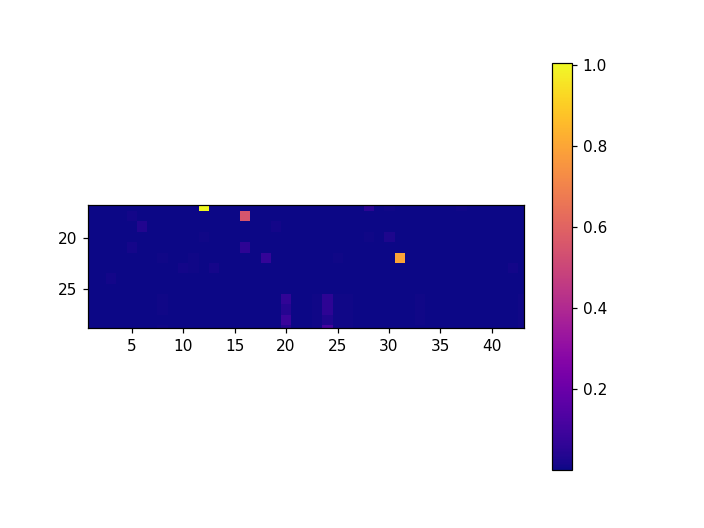

In [122]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(dists, 
           #vmin=0, vmax=10, 
           cmap='plasma')
plt.colorbar()

In [123]:
allowed_drift_th = 3
x_coords, y_coords = np.where(dists > 1/allowed_drift_th)
kept_spots_748, kept_spots_637 = daxp.spots_748[x_coords], daxp.spots_637[y_coords]
daxp.save_filename

'/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5'

'Conv_zscan_001'

<IPython.core.display.Javascript object>


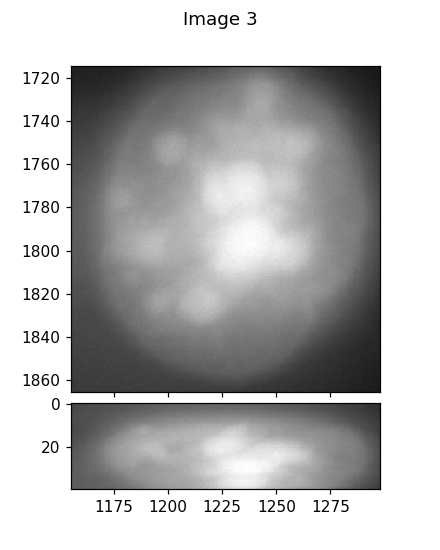

In [107]:
coord_dict = {
    'coords':list(np.concatenate([kept_spots_748.to_coords(), 
                             kept_spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(kept_spots_748))) + list(1 * np.ones(len(kept_spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

In [109]:
from ChromAn.src.file_io.image_crop import crop_neighboring_area

In [112]:
_local_crop = crop_neighboring_area(daxp.im_637, kept_spots_637.to_coords()[10], 3)

In [114]:
_local_crop = crop_neighboring_area(daxp.im_405, kept_spots_637.to_coords()[10], 3)

In [115]:
np.mean(_local_crop)

37047.0

In [135]:
daxp._save_base_to_hdf5()

- use default save filename.
- saving to new file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
filename
inf_filename
off_filename
power_filename
xml_filename
save_filename
correction_folder
channels
-- updated the following basic information: filename,inf_filename,off_filename,power_filename,xml_filename,save_filename,correction_folder,channels


In [ ]:
# run quick segmentation

In [ ]:
%matplotlib notebook
f = plt.figure(dpi=125)
interactive.imshow_mark_3d(
    [getattr(daxp, f"im_{_ch}") for _ch in daxp.channels], 
    fig=f,
    image_names=daxp.channels, 
    min_max_default=[0,20000],
    )
f.show()

In [ ]:
# generate a new